In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham (9).csv


In [0]:
import io
hd = pd.read_csv(io.BytesIO(uploaded['framingham.csv']))
hd.drop(['education'], 
        axis = 1, 
        inplace = True)
hd.dropna(axis = 0, 
          inplace = True)
attrib = hd.iloc[:, :-1]
lab = hd.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(attrib, lab, 
                                                    test_size = .20, 
                                                    random_state = 0)

class_weights = {0: 0.2, 1: 1.0}
class_weights

{0: 0.25, 1: 1.0}

In [5]:
from keras import Sequential, regularizers
from keras.layers import Dense, Activation, Dropout
model = Sequential()
model.add(Dense(200, input_dim = 14, 
                kernel_initializer = 'random_uniform', 
                bias_initializer = 'zeros'))
model.add(Activation('relu', name = 'A1'))
model.add(Dense(200, 
                kernel_initializer = 'random_uniform', 
                bias_initializer = 'zeros'))
model.add(Activation('relu', name = 'A2'))
#model.add(Dense(100, 
#                kernel_initializer = 'random_uniform', 
#                bias_initializer = 'zeros'))
#model.add(Activation('relu', name = 'A3'))
model.add(Dense(1, 
                kernel_initializer = 'random_uniform', 
                bias_initializer = 'zeros'))
model.add(Activation('sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
from keras import optimizers
model.compile(optimizer = 'Adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               3000      
_________________________________________________________________
A1 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
A2 (Activation)              (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 43,401
Trainable params: 43,401
Non-trainable params: 0
_________________________________________________________________


In [7]:
history = model.fit(x_train, y_train, 
          validation_split = 0.25, 
          batch_size = 10, 
          epochs = 10,
          verbose = 1,
          class_weight = class_weights)

Instructions for updating:
Use tf.cast instead.
Train on 2250 samples, validate on 750 samples
Epoch 1/10
2250/2250 [==============================] - 2s 830us/step - loss: 0.2578 - acc: 0.6693 - val_loss: 0.2807 - val_acc: 0.1560
Epoch 2/10
2250/2250 [==============================] - 1s 326us/step - loss: 0.2523 - acc: 0.6871 - val_loss: 0.2413 - val_acc: 0.8293
Epoch 3/10
2250/2250 [==============================] - 1s 322us/step - loss: 0.2437 - acc: 0.7249 - val_loss: 0.2397 - val_acc: 0.8280
Epoch 4/10
2250/2250 [==============================] - 1s 325us/step - loss: 0.2381 - acc: 0.7116 - val_loss: 0.2469 - val_acc: 0.8347
Epoch 5/10
2250/2250 [==============================] - 1s 323us/step - loss: 0.2408 - acc: 0.7178 - val_loss: 0.2346 - val_acc: 0.7613
Epoch 6/10
2250/2250 [==============================] - 1s 326us/step - loss: 0.2347 - acc: 0.7236 - val_loss: 0.2387 - val_acc: 0.6747
Epoch 7/10
2250/2250 [==============================] - 1s 325us/step - loss: 0.2363 - ac

In [8]:
val_acc = np.array(history.history['val_acc'])
val_loss = np.array(history.history['val_loss'])
model_acc = np.array(history.history['acc'])
model_loss = np.array(history.history['loss'])
print('Average validation loss:', val_loss.sum()/200)
print('Average validation accuracy:', val_acc.sum()/200)
print('Average loss:', model_loss.sum()/200)
print('Average accuracy:', model_acc.sum()/200)

Average validation loss: 0.012183467371513445
Average validation accuracy: 0.036753333239257335
Average loss: 0.01201665335264471
Average accuracy: 0.03586666661020782


In [9]:
evaluation = model.evaluate(x_train, y_train)
print('Loss:', evaluation[0])
print('Accuracy:', evaluation[1])

3000/3000 [==============================] - 0s 36us/step
Loss: 0.44712415885925294
Accuracy: 0.8410000001589457


In [0]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted: 0', 'Predicted: 1'], 
                           index = ['Actual:0', 'Actual:1'])
print('Accuracy:', accuracy_score(y_test, y_pred))
conf_matrix

Accuracy: 0.8375499334221038


,Predicted: 0,Predicted: 1
Actual:0,623,24
Actual:1,98,6


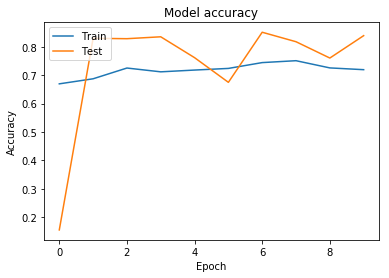

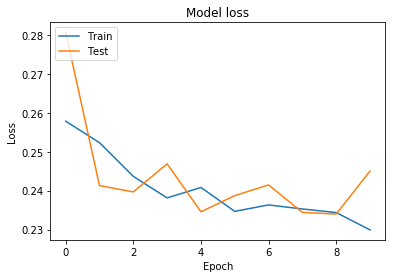

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()